# Our Own Classification Task

We're going to classify a very popular dataset from the University of California at Irvine referenced in this paper:


P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


I obtained the dataset from Kaggle: 

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [ ]:
import pandas as pd
import os

In [ ]:
pwd = os.getcwd()  # pwd = Present Working Directory
wine_filepath = os.path.join(pwd,"wine.csv")

In [ ]:
data_import = pd.read_csv(wine_filepath)
data_import

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Prepare the Data for Classification

You'll notice the last column called "quality" is a numerical column. We'll call any wines with a quality of 3, 4, or 5 "Bad" and any wines with a qualilty of 6, 7, or 8 "Good". If we create a histogram below you'll see why. 

<Axes: >

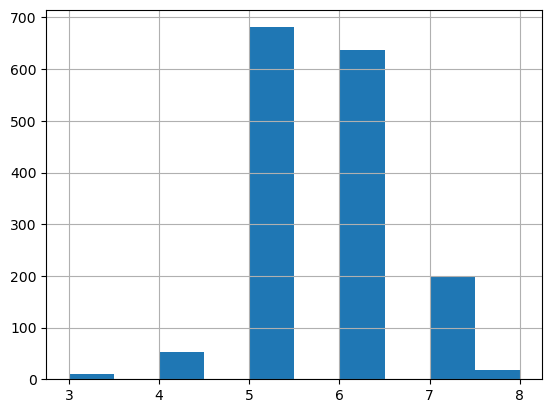

In [ ]:
data_import["quality"].hist()

In [ ]:
data_import["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
y = data_import["quality"] > 5
y

0       False
1       False
2       False
3        True
4       False
        ...  
1594    False
1595     True
1596     True
1597    False
1598     True
Name: quality, Length: 1599, dtype: bool

In [ ]:
X = data_import.iloc[:, :-1]  #iloc = Index loc, syntax:[rows,cols], last col is dropped as it is the quality column which we need to predict
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)  #fit_transform---> Fitting as well as transforming data
scaled_X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [ ]:
scaled_X_test = scaler.transform(X_test)   # We don't need to fit here we just need to transform as the model has already learned through fitting X_train 
scaled_X_test

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01, ...,
        -4.65392578e-01, -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01, ...,
         5.08915214e-01, -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01, ...,
        -2.05577167e-01,  1.83329452e+00, -4.92358280e-01],
       ...,
       [-1.37449586e-02,  3.87494284e-01, -1.15015218e-01, ...,
        -1.04997725e+00, -7.44964886e-01, -5.87389780e-01],
       [ 2.76350785e-01, -1.45397070e+00,  6.01568807e-01, ...,
        -1.04997725e+00,  1.71749571e-01,  7.43051230e-01],
       [ 4.50408230e-01,  1.30822677e+00, -1.18989125e+00, ...,
        -1.40623314e-01, -6.87670232e-01, -6.82421281e-01]])

## Modeling

In [ ]:
from sklearn.svm import SVC   #svm = Support Vector Machine 

svm_clf = SVC()
svm_clf.fit(scaled_X_train, y_train)   #We are making our data learn stuff through svm_clf.fit

SVC()

In [ ]:
y_test_predict = svm_clf.predict(scaled_X_test)
y_test_predict

array([False, False,  True, False,  True, False, False, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,

## Accuracy Metrics

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

binary_conf_matrix = confusion_matrix(y_test, y_test_predict)    #confusion_matrix(actual, predicted)
binary_conf_matrix

array([[109,  32],
       [ 41, 138]], dtype=int64)

### Precision and Recall

In [ ]:
accuracy_score(y_test, y_test_predict)

0.771875

In [ ]:
precision_score(y_test, y_test_predict)

0.8117647058823529

In [ ]:
recall_score(y_test, y_test_predict)

0.770949720670391

### ROC Curve

Text(0, 0.5, 'True Positive Rate')

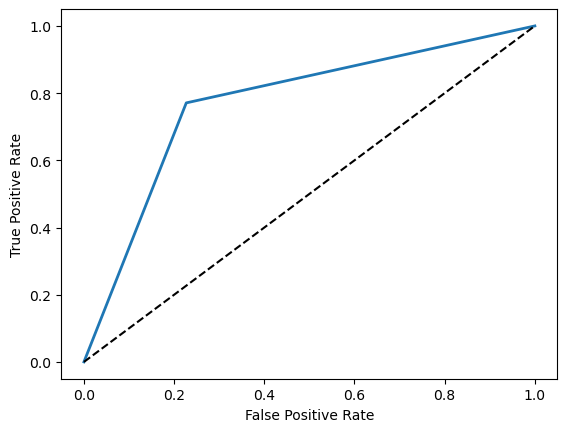

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_predict)

0.771999683030231

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_predictions = rfc.predict(scaled_X_test,)

In [ ]:
from sklearn.metrics import confusion_matrix

rfc_conf_matrix = confusion_matrix(y_test, rfc_predictions)
rfc_conf_matrix

array([[111,  30],
       [ 34, 145]], dtype=int64)

In [ ]:
accuracy_score(y_test, rfc_predictions)

0.8

In [ ]:
recall_score(y_test, rfc_predictions)

0.8100558659217877

In [ ]:
precision_score(y_test, rfc_predictions)

0.8285714285714286

Text(0, 0.5, 'True Positive Rate')

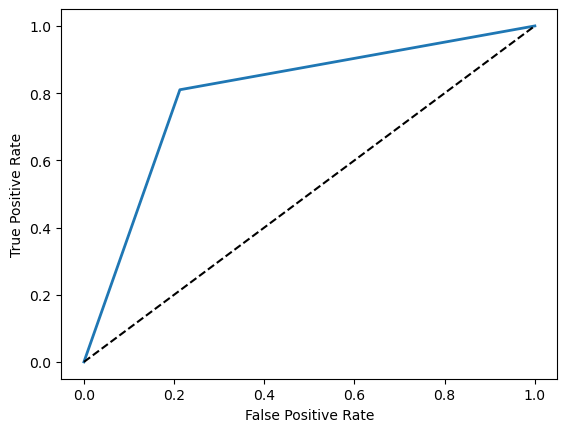

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rfc_predictions)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, rfc_predictions)

0.7986449542374896

### Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
rfc = RandomForestClassifier()

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rfc, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_
best_estimator = grid_search.best_estimator_
best_estimator

RandomForestClassifier(max_features=2, n_estimators=30)

In [ ]:
best_estimator_predictions = best_estimator.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

rfc_conf_matrix = confusion_matrix(y_test, best_estimator_predictions)
rfc_conf_matrix

array([[106,  35],
       [ 27, 152]], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

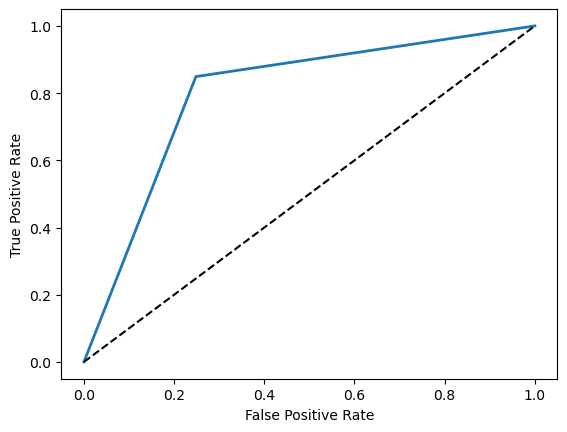

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, best_estimator_predictions)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Output The Machine's Result

In [ ]:
y_test_predict

array([False, False,  True, False,  True, False, False, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,

In [ ]:
rfc_predictions

array([False, False, False, False,  True, False, False, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False,  True, False,  True, False,  True,  True,
       False, False,  True, False, False,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True, False,
        True, False, False, False, False,  True, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False,

In [ ]:
best_estimator_predictions

array([False, False, False, False,  True, False, False, False,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True, False, False,  True, False,  True, False,  True,  True,
       False, False,  True, False, False,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True, False,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False,

## Multi-Class Classification

Let's try and classify into three different categories: "Bad", "Normal", "Best", and try to create a multi-class classifier.

In [ ]:
multi_class = data_import.copy()
multi_class

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
multi_class_mapper = {3:"Bad", 4:"Bad", 5:"Normal", 6:"Normal", 7:"Good", 8:"Good"}
multi_class_mapper

{3: 'Bad', 4: 'Bad', 5: 'Normal', 6: 'Normal', 7: 'Good', 8: 'Good'}

In [ ]:
multi_class_y = multi_class["quality"].map(multi_class_mapper)
multi_class_y

0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
1594    Normal
1595    Normal
1596    Normal
1597    Normal
1598    Normal
Name: quality, Length: 1599, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, multi_class_y_train, multi_class_y_test = train_test_split(X, multi_class_y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(scaled_X_train, multi_class_y_train)

RandomForestClassifier()

In [ ]:
multi_predictions = rfc.predict(scaled_X_test)

In [ ]:
multi_matrix = confusion_matrix(multi_class_y_test, multi_predictions)
multi_matrix

array([[  1,   0,  10],
       [  0,  24,  23],
       [  0,  11, 251]])

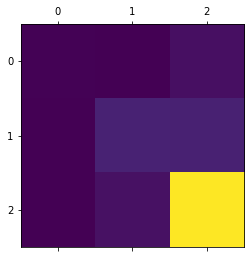

In [ ]:
plt.matshow(multi_matrix)

In [ ]:
# You can only make the ROC curve for binary classifiers

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(multi_class_y_test, multi_predictions)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

ValueError: multiclass format is not supported

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
rfc = RandomForestClassifier()

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rfc, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, multi_class_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
multi_best = grid_search.best_estimator_
multi_best

RandomForestClassifier(max_features=4, n_estimators=30)

In [ ]:
multi_predictions = multi_best.predict(scaled_X_test)

In [ ]:
confusion_matrix(multi_class_y_test, multi_predictions)

array([[ 11,   0,   0],
       [  3,  17,  27],
       [ 86,  26, 150]])

In [ ]:
precision_score(multi_class_y_test, multi_predictions, average="weighted")

0.755704042668506

### Multi-Label Classifier

In [ ]:
quality = data_import["quality"] > 5
alcohol = data_import["alcohol"] > 10
y_multi_label = np.c_[alcohol, quality]
y_multi_label

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [ True,  True],
       [ True, False],
       [ True,  True]])

In [ ]:
x_multi_label = data_import.iloc[:, :-2]
x_multi_label

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71


In [ ]:
from sklearn.model_selection import train_test_split

multi_label_X_train, multi_label_X_test, multi_label_y_train, multi_label_y_test = train_test_split(x_multi_label, y_multi_label, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

multi_label_scaled_X_train = scaler.fit_transform(X_train)
multi_label_scaled_X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(multi_label_X_train, multi_label_y_train)

KNeighborsClassifier()

In [ ]:
multi_label_predictions = knn_clf.predict(multi_label_X_test)
multi_label_predictions[:5]

array([[False,  True],
       [False, False],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [ ]:
# You can't use confusion matrices on both predictions simultaneously

confusion_matrix(multi_label_y_test, multi_class_predictions)

ValueError: multilabel-indicator is not supported

In [ ]:
alc_predictions = [i[0] for i in multi_label_predictions]
qual_predictions = [i[1] for i in multi_label_predictions]

In [ ]:
alc_test = [i[0] for i in multi_label_y_test]
qual_test = [i[1] for i in multi_label_y_test]

In [ ]:
alc_confusion_matrix = confusion_matrix(alc_test, alc_predictions)
qual_confusion_matrix = confusion_matrix(qual_test, qual_predictions)

array([[ 92,  59],
       [ 59, 110]])

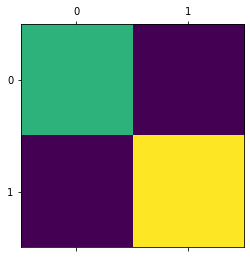

In [ ]:
plt.matshow(alc_confusion_matrix)
alc_confusion_matrix

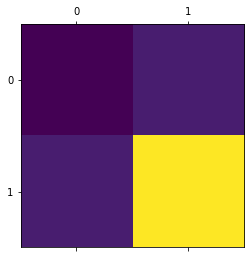

In [ ]:
plt.matshow(qual_confusion_matrix)
qual_confusion_matrix